In [2]:
import torch
from torch.nn import functional as F
from torch.autograd import Variable
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
%matplotlib inline

### 1.建立数据集


torch.Size([100, 1])


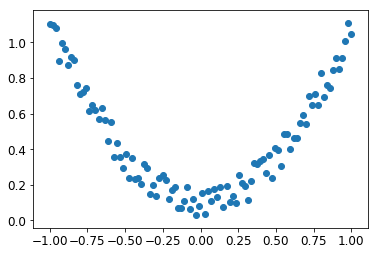

In [16]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
print(x.size())
y = x.pow(2) + 0.2*torch.rand(x.size())     # noisy y data (tensor), shape=(100, 1)
# 用Variable装饰这些数据
x, y = torch.autograd.Variable(x), Variable(y)
# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show();


### 2.建立神经网络
* 建立一个神经网络我们可以直接运用 torch 中的体系. 先定义所有的层属性( __init__() ), 然后再一层层搭建( forward(x) )层于层的关系链接. 建立关系的时候, 我们会用到激活函数

In [13]:
import torch
from torch.nn import functional as F

class Net(torch.nn.Module):   # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()  # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)  # 输出层线性输出
    def forward(self, x):  # 这同时也是 Module 中的 forward 功能
        x = F.relu(self.hidden(x))  # 激活函数(隐藏层的线性值)
        x = self.predict(x)  # 输出值
        return x
    
        

net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)  # net 的结构


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


### 3.训练网络

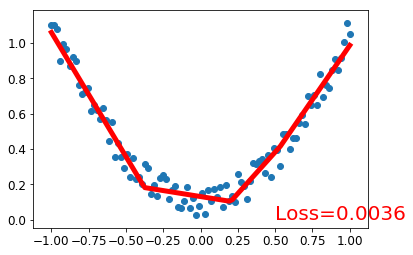

In [17]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()  # 预测值和真实值的误差计算公式 (均方差)


plt.ion() 

for t in range(200):
    prediction = net(x)   # 喂给net训练数据，输出预测值
    loss = loss_func(prediction, y)  # 计算两者的误差
    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show();
    